In [188]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [67]:
train = pd.read_csv('data_assignment.csv')
test = pd.read_csv('test_BigMartSales.csv')

In [68]:
sample = pd.read_csv('sample_submission_8RXa3c6.csv')

In [69]:
train.shape

(8523, 12)

In [70]:
test.shape

(5681, 11)

In [71]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [72]:
train['Item_Outlet_Sales'].mean()

2181.2889135750365

In [73]:
sample['Item_Outlet_Sales'] = train['Item_Outlet_Sales'].mean()

In [74]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914
...,...,...,...
5676,FDB58,OUT046,2181.288914
5677,FDD47,OUT018,2181.288914
5678,NCO17,OUT045,2181.288914
5679,FDJ26,OUT017,2181.288914


In [75]:
sample.to_csv('test_benchmark.csv', index = False)

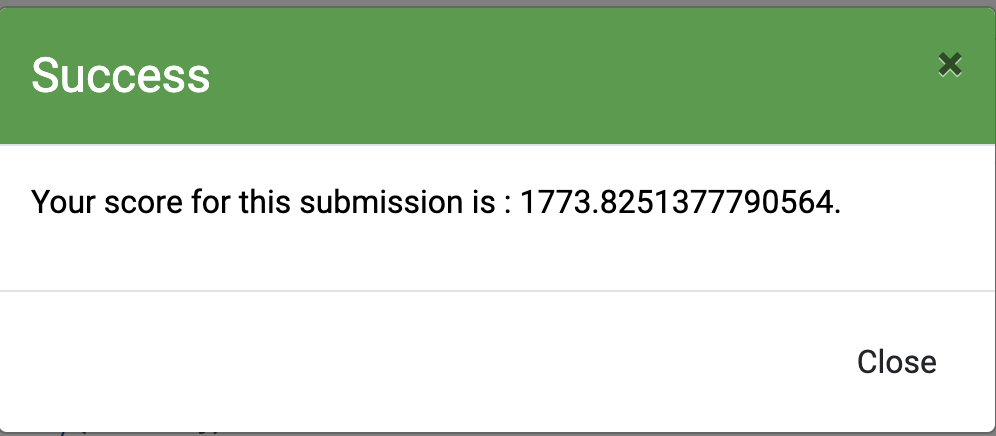

In [76]:
result = test[['Item_Identifier', 'Outlet_Identifier']]

In [77]:
result['Item_Outlet_Sales'] = train['Item_Outlet_Sales'].mean()

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_3918/1001671821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Item_Outlet_Sales'] = train['Item_Outlet_Sales'].mean()


In [78]:
result

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914
...,...,...,...
5676,FDB58,OUT046,2181.288914
5677,FDD47,OUT018,2181.288914
5678,NCO17,OUT045,2181.288914
5679,FDJ26,OUT017,2181.288914


# Modelling with one column

In [79]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [80]:
columns = 'Item_MRP'

In [81]:
model = LinearRegression()

In [82]:
model.fit(train[['Item_MRP']], train['Item_Outlet_Sales'])

LinearRegression()

In [83]:
res_mrp_simple = model.predict(test[['Item_MRP']])

In [84]:
res_mrp_simple

array([1666.00819233, 1346.51176166, 3748.4273983 , ..., 1835.25308384,
       3326.44276374, 1229.49392319])

In [85]:
result['Item_Outlet_Sales']  = res_mrp_simple

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_3918/490023130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Item_Outlet_Sales']  = res_mrp_simple


In [86]:
result.to_csv('result_item_mrp.csv', index = False)

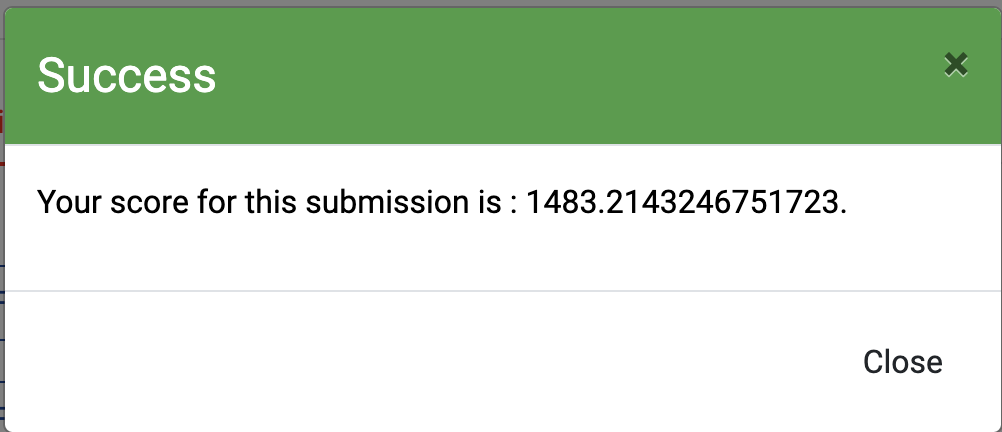

In [87]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [88]:
# Combine the train + test
# Perform the preprocessing
# separate the preprocessed train. data
# Model on the preprocessed train data
# predict on the preprocessed test data

In [89]:
# Combine the train and test data

In [90]:
train['source'] = 'train'
test['source'] = 'test'

In [91]:
data = pd.concat([train, test])

In [92]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


# Feature Extraction

### Creating a new feature out of an excisting feature

In [93]:
data['Item_Identifier_code'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [94]:
data[['Item_Identifier','Item_Identifier_code']]

,Item_Identifier,Item_Identifier_code
0,FDA15,FD
1,DRC01,DR
2,FDN15,FD
3,FDX07,FD
4,NCD19,NC
...,...,...
5676,FDB58,FD
5677,FDD47,FD
5678,NCO17,NC
5679,FDJ26,FD


In [95]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [96]:
data['Item_Identifier'].nunique()

1559

In [97]:
data['Item_Identifier_code'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [98]:
data['Outlet_Age'] = 2023 - data['Outlet_Establishment_Year']

In [99]:
del data['Outlet_Establishment_Year']

# Missing Value treatement

In [100]:
data.isna().sum()

Item_Identifier            0
Item_Weight             2439
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
source                     0
Item_Identifier_code       0
Outlet_Age                 0
dtype: int64

In [101]:
data['Item_Weight'] = data.groupby(['Item_Identifier_code','Item_Type']).Item_Weight.transform(lambda x: x.fillna(x.mean()))
                                                                                               

In [102]:
data.isna().sum()

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
source                     0
Item_Identifier_code       0
Outlet_Age                 0
dtype: int64

In [103]:
data['Outlet_Size'] = data.groupby(['Outlet_Type']).Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))


In [104]:
data.isna().sum()

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
source                     0
Item_Identifier_code       0
Outlet_Age                 0
dtype: int64

# Data Correction

In [105]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [106]:
data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular', 'low fat' : 'Low Fat'}, inplace = True)


In [107]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:ylabel='Frequency'>

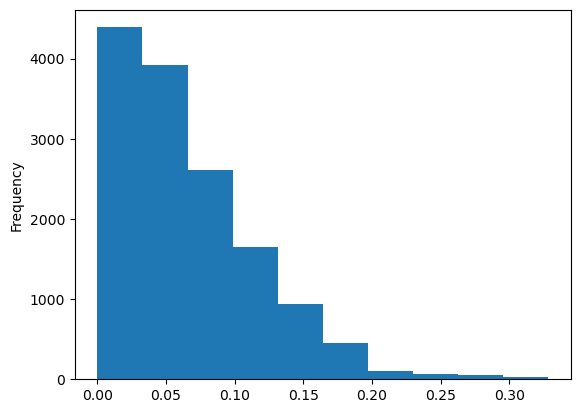

In [108]:
data['Item_Visibility'].plot(kind = 'hist' )

In [109]:
data['Item_Visibility'].value_counts()

0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [112]:
data.loc[data['Item_Visibility']==0.000000,'Item_Visibility' ] = np.NaN

In [114]:
data.isna().sum()

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility          879
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
source                     0
Item_Identifier_code       0
Outlet_Age                 0
dtype: int64

In [116]:
data['Item_Visibility'] = data.groupby(['Item_Identifier_code','Item_Type']).Item_Visibility.transform(lambda x: x.fillna(x.mean()))


In [117]:
data.isna().sum()

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
source                     0
Item_Identifier_code       0
Outlet_Age                 0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

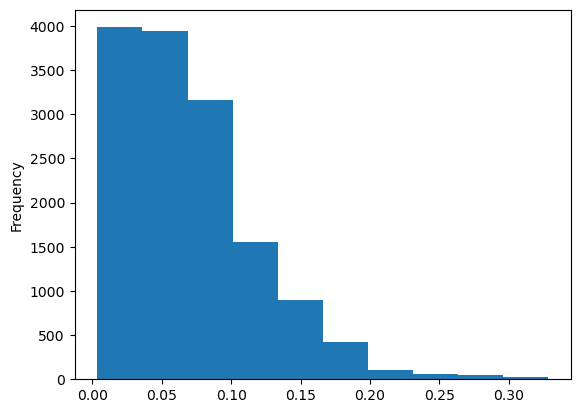

In [118]:
data['Item_Visibility'].plot(kind = 'hist' )

# Encoding of Features

In [122]:
cat_columns = data.select_dtypes(exclude = np.number).drop(columns=['Item_Identifier', 'source'])


In [124]:
encoded_cat = pd.get_dummies(cat_columns)

In [127]:
numerical_data = data.select_dtypes(include = np.number)

In [129]:
encoded_cat = encoded_cat.reset_index().drop(columns='index')
numerical_data = numerical_data.reset_index().drop(columns='index')

In [148]:
item_ident_source = data[['Item_Identifier','Outlet_Identifier', 'source']].reset_index().drop(columns='index')

In [149]:
data_preprocessed = pd.concat([numerical_data,encoded_cat,item_ident_source], axis =1)

In [150]:
train_preprocessed = data_preprocessed[data_preprocessed['source']=='train']

In [151]:
train_preprocessed.drop(columns='source', inplace = True)

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_3918/1295772899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_preprocessed.drop(columns='source', inplace = True)


In [152]:
train_preprocessed

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_code_DR,Item_Identifier_code_FD,Item_Identifier_code_NC,Item_Identifier,Outlet_Identifier
0,9.300,0.016047,249.8092,3735.1380,24,1,0,0,0,0,...,0,0,1,0,0,0,1,0,FDA15,OUT049
1,5.920,0.019278,48.2692,443.4228,14,0,1,0,0,0,...,1,0,0,1,0,1,0,0,DRC01,OUT018
2,17.500,0.016760,141.6180,2097.2700,24,1,0,0,0,0,...,0,0,1,0,0,0,1,0,FDN15,OUT049
3,19.200,0.073305,182.0950,732.3800,25,0,1,0,0,0,...,1,1,0,0,0,0,1,0,FDX07,OUT010
4,8.930,0.063186,53.8614,994.7052,36,1,0,0,0,0,...,1,0,1,0,0,0,0,1,NCD19,OUT013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,36,1,0,0,0,0,...,1,0,1,0,0,0,1,0,FDF22,OUT013
8519,8.380,0.046982,108.1570,549.2850,21,0,1,1,0,0,...,0,0,1,0,0,0,1,0,FDS36,OUT045
8520,10.600,0.035186,85.1224,1193.1136,19,1,0,0,0,0,...,0,0,1,0,0,0,0,1,NCJ29,OUT035
8521,7.210,0.145221,103.1332,1845.5976,14,0,1,0,0,0,...,1,0,0,1,0,0,1,0,FDN46,OUT018


In [153]:
test_preprocessed = data_preprocessed[data_preprocessed['source']=='test']

In [154]:
test_preprocessed

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_code_DR,Item_Identifier_code_FD,Item_Identifier_code_NC,Item_Identifier,Outlet_Identifier,source
8523,20.75000,0.007565,107.8622,NaN,24,1,0,0,0,0,...,0,1,0,0,0,1,0,FDW58,OUT049,test
8524,8.30000,0.038428,87.3198,NaN,16,0,1,0,0,0,...,0,1,0,0,0,1,0,FDW14,OUT017,test
8525,14.60000,0.099575,241.7538,NaN,25,1,0,0,0,0,...,1,0,0,0,0,0,1,NCN55,OUT010,test
8526,7.31500,0.015388,155.0340,NaN,16,1,0,0,0,0,...,0,1,0,0,0,1,0,FDQ58,OUT017,test
8527,13.04178,0.118599,234.2300,NaN,38,0,1,0,0,0,...,0,0,0,1,0,1,0,FDY38,OUT027,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50000,0.013496,141.3154,NaN,26,0,1,0,0,0,...,0,1,0,0,0,1,0,FDB58,OUT046,test
14200,7.60000,0.142991,169.1448,NaN,14,0,1,0,0,0,...,0,0,1,0,0,1,0,FDD47,OUT018,test
14201,10.00000,0.073529,118.7440,NaN,21,1,0,0,0,0,...,0,1,0,0,0,0,1,NCO17,OUT045,test
14202,15.30000,0.071811,214.6218,NaN,16,0,1,0,0,0,...,0,1,0,0,0,1,0,FDJ26,OUT017,test


In [155]:
test_preprocessed.drop(columns=['source', 'Item_Outlet_Sales'], inplace = True)

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_3918/3175965521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_preprocessed.drop(columns=['source', 'Item_Outlet_Sales'], inplace = True)


In [156]:
test_preprocessed

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_code_DR,Item_Identifier_code_FD,Item_Identifier_code_NC,Item_Identifier,Outlet_Identifier
8523,20.75000,0.007565,107.8622,24,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,FDW58,OUT049
8524,8.30000,0.038428,87.3198,16,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,FDW14,OUT017
8525,14.60000,0.099575,241.7538,25,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,NCN55,OUT010
8526,7.31500,0.015388,155.0340,16,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,FDQ58,OUT017
8527,13.04178,0.118599,234.2300,38,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,FDY38,OUT027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50000,0.013496,141.3154,26,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,FDB58,OUT046
14200,7.60000,0.142991,169.1448,14,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,FDD47,OUT018
14201,10.00000,0.073529,118.7440,21,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,NCO17,OUT045
14202,15.30000,0.071811,214.6218,16,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,FDJ26,OUT017


In [162]:
train_preprocessed.to_csv('train_preprocessed.csv', index = False)
test_preprocessed.to_csv('test_preprocessed.csv', index = False)


# Modelling

In [165]:
X = train_preprocessed.drop(columns=['Item_Outlet_Sales','Item_Identifier', 'Outlet_Identifier'])


In [166]:
y = train_preprocessed['Item_Outlet_Sales']

In [167]:
model = LinearRegression()

In [168]:
model.fit(X,y)

LinearRegression()

In [171]:
train_predict = model.predict(X)

In [174]:
test_X = test_preprocessed.drop(columns=['Item_Identifier', 'Outlet_Identifier'])


In [175]:
test_predict = model.predict(test_X)

In [176]:
test_predict

array([1832.65244261, 1520.18863505, 1883.4402858 , ..., 1826.67394551,
       3568.66985479, 1289.88572258])

In [178]:
sample['Item_Outlet_Sales'] = test_predict

In [180]:
sample['Item_Outlet_Sales']

0       1832.652443
1       1520.188635
2       1883.440286
3       2577.216938
4       5133.704490
           ...     
5676    2300.979175
5677    2462.092472
5678    1826.673946
5679    3568.669855
5680    1289.885723
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [183]:
sample['Item_Outlet_Sales'] = abs(sample['Item_Outlet_Sales'])

<AxesSubplot:ylabel='Frequency'>

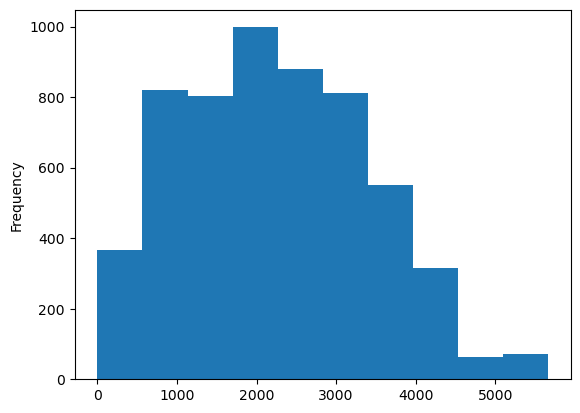

In [185]:
sample['Item_Outlet_Sales'].plot(kind = 'hist')

In [184]:
sample.to_csv('LR_All_Columns.csv', index = False)

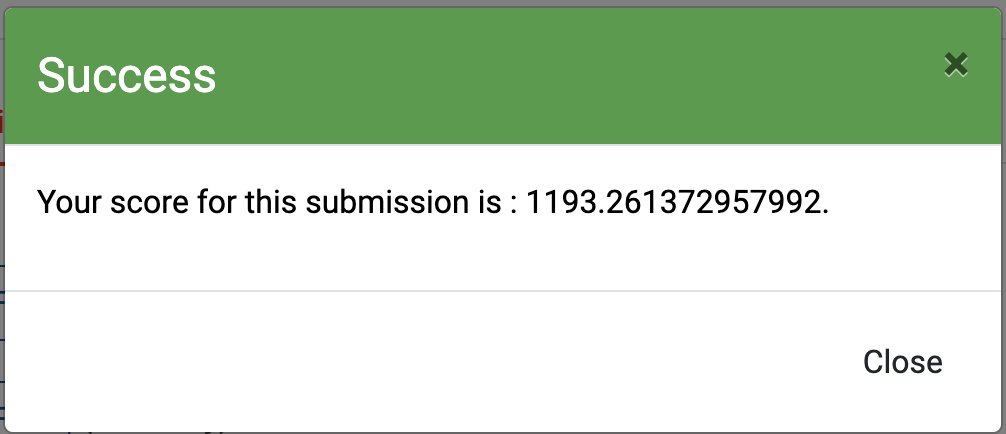

In [187]:
train_predict

array([4005.37758018,  559.425737  , 2368.29724095, ..., 1525.11554453,
       1400.64416964, 1210.05855095])

In [190]:
np.sqrt(mean_squared_error(y,train_predict ))

1127.0842767280371

In [192]:
model.coef_

array([-3.27900565e-01, -2.21305425e+02,  1.55702494e+01,  1.57633729e+01,
       -2.10113356e+01,  2.10113356e+01, -2.67204607e+00,  2.73888506e+00,
        2.76337640e+00,  2.25100966e+01, -5.35304871e+01, -3.07288874e+01,
        2.70005571e+01, -4.85954774e+01,  4.68766372e+00, -2.46375515e+01,
       -3.20033819e+00, -6.64981439e+00,  1.81727733e+02, -1.42281926e+01,
       -7.62229795e+01,  1.90374620e+01, -4.41347871e+02, -1.03057352e+02,
        1.69617864e+02, -8.14768894e+01, -4.46332189e+02,  5.92949409e+02,
        1.61845734e+02, -8.33306902e+01,  3.71284503e+02, -1.40152518e+02,
       -1.03057352e+02,  3.71320002e+02, -2.68262649e+02, -2.15200204e+02,
        2.48132908e+02, -3.29327040e+01, -8.87680060e+02,  3.76207540e+02,
       -8.14768894e+01,  5.92949409e+02,  3.66637414e+01, -1.00640392e+01,
       -2.65997022e+01])

<AxesSubplot:>

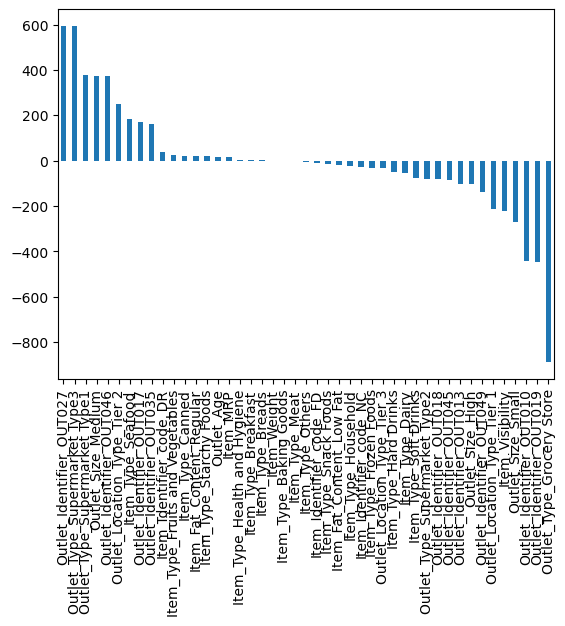

In [197]:
pd.Series(model.coef_, X.columns).sort_values(ascending = False).plot(kind = 'bar')

In [198]:
pd.Series(model.coef_, X.columns).sort_values(ascending = False)

Outlet_Identifier_OUT027           592.949409
Outlet_Type_Supermarket Type3      592.949409
Outlet_Type_Supermarket Type1      376.207540
Outlet_Size_Medium                 371.320002
Outlet_Identifier_OUT046           371.284503
Outlet_Location_Type_Tier 2        248.132908
Item_Type_Seafood                  181.727733
Outlet_Identifier_OUT017           169.617864
Outlet_Identifier_OUT035           161.845734
Item_Identifier_code_DR             36.663741
Item_Type_Fruits and Vegetables     27.000557
Item_Type_Canned                    22.510097
Item_Fat_Content_Regular            21.011336
Item_Type_Starchy Foods             19.037462
Outlet_Age                          15.763373
Item_MRP                            15.570249
Item_Type_Health and Hygiene         4.687664
Item_Type_Breakfast                  2.763376
Item_Type_Breads                     2.738885
Item_Weight                         -0.327901
Item_Type_Baking Goods              -2.672046
Item_Type_Meat                    

In [199]:
model.intercept_

-563.5030355389299

In [211]:
from datetime import date
import holidays
  
uk_holidays = holidays.UnitedKingdom()
for ptr in holidays.UnitedKingdom(years = 2019).items():
    print(ptr)

(datetime.date(2019, 1, 1), "New Year's Day")
(datetime.date(2019, 12, 25), 'Christmas Day')
(datetime.date(2019, 12, 26), 'Boxing Day')
(datetime.date(2019, 4, 19), 'Good Friday')
(datetime.date(2019, 5, 6), 'May Day')
(datetime.date(2019, 5, 27), 'Spring Bank Holiday')


In [204]:
!pip install holidays


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 736.9/736.9 kB 2.6 MB/s eta 0:00:0000:0100:01
